 # Questions:
 
 1. Is there any strong or weak correlation between rainfall & price of onion & Tomato ?
 2. Is there any differences of price between states / Regions?
 3. Is there any other factors apart from rainfall on the price of onion & Tomato?
 4. How to analyse the supply & demand and decide which crop to harvest as a farmer?
 5. which region is the best place to sell?
 6. Average price of Onions is 1300. Prove it with 95% confidence level


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy.stats as stats

#Pre-defining the default plots
plt.style.use('ggplot')
plt.rcParams['font.size']=10
plt.rcParams['patch.edgecolor']="b"

# import statsmodels
import statsmodels.api as sm

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

In [4]:
data=pd.read_csv('Onion_weekly.csv')

In [5]:
data.head()

,Year,CW,Bangalore_Price,Delhi_Price,Hyderabad_Price,Kolkata_Price,Pune_Price,Karnataka,Delhi,Andrapradesh,Westbengal,Maharashtra
0,2015,1,1200,1462,1125,1967.0,1175,5.5,12.4,21.4,28.6,37.8
1,2015,2,1359,1383,1260,1596.0,1290,5.5,12.4,21.4,28.6,37.8
2,2015,3,1208,1256,906,1771.0,1167,5.5,12.4,21.4,28.6,37.8
3,2015,4,1352,1321,1130,1625.0,1150,5.5,12.4,21.4,28.6,37.8
4,2015,5,1323,1412,1400,1750.0,1120,5.5,12.4,21.4,28.6,37.8


step 1: describe the data
Step 2 : plot the data with histogram, box plot, cross plot, heatmap (pearson correlation)
step 3 : check whether the data is normal and variances are equal and decide what tests can be done based on the questions (1 sample z test or t-test) - hypothesis testing
step 4 : Simulation
step 5 : Conclude with the suggestions based on test results

In [6]:
data.shape

(158, 12)

In [7]:
data.dtypes

Year                 int64
CW                   int64
Bangalore_Price      int64
Delhi_Price          int64
Hyderabad_Price      int64
Kolkata_Price      float64
Pune_Price           int64
Karnataka          float64
Delhi              float64
Andrapradesh       float64
Westbengal         float64
Maharashtra        float64
dtype: object

In [8]:
data['Year']=data['Year'].astype('object',copy='False')
data['CW']=data['CW'].astype('object',copy='False')

In [9]:
data.dtypes

Year                object
CW                  object
Bangalore_Price      int64
Delhi_Price          int64
Hyderabad_Price      int64
Kolkata_Price      float64
Pune_Price           int64
Karnataka          float64
Delhi              float64
Andrapradesh       float64
Westbengal         float64
Maharashtra        float64
dtype: object

# description of the data

In [10]:
data.describe()

,Bangalore_Price,Delhi_Price,Hyderabad_Price,Kolkata_Price,Pune_Price,Karnataka,Delhi,Andrapradesh,Westbengal,Maharashtra
count,158.000000,158.000000,158.000000,151.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,1305.702532,1352.417722,1228.582278,1911.529801,1468.360759,353.740506,33.072152,211.340506,326.310127,201.808861
std,804.636671,823.491380,917.682648,1139.755400,1133.007211,401.908934,43.551593,213.064083,344.826656,265.100432
min,545.000000,596.000000,321.000000,580.000000,400.000000,0.000000,0.000000,0.000000,0.300000,0.000000
25%,719.500000,737.500000,619.000000,1091.500000,719.000000,20.400000,1.925000,20.800000,28.600000,7.725000
50%,988.000000,1093.000000,931.500000,1435.000000,998.000000,203.500000,10.300000,97.100000,172.600000,38.000000
75%,1585.250000,1603.750000,1477.250000,2369.000000,1771.250000,614.300000,43.700000,451.700000,591.100000,457.100000
max,3880.000000,4232.000000,4825.000000,5533.000000,5467.000000,1272.100000,159.800000,651.500000,1066.800000,1085.900000


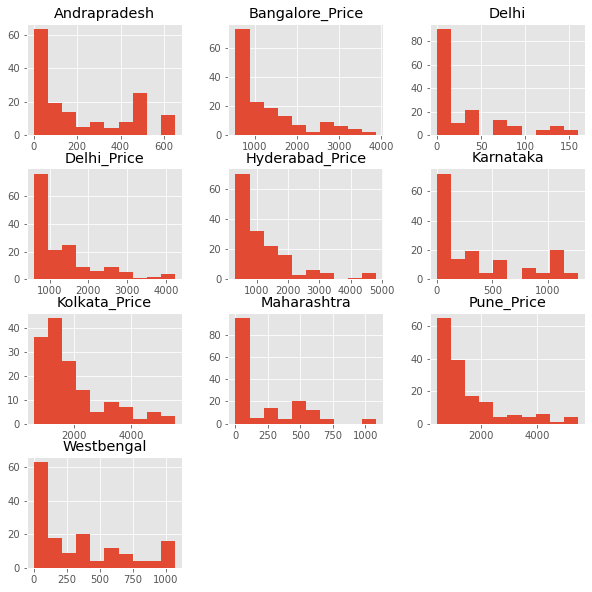

In [11]:
#Looking at the distibution and spread of the data
data.hist(figsize=(10,10), bins=10)
plt.show()

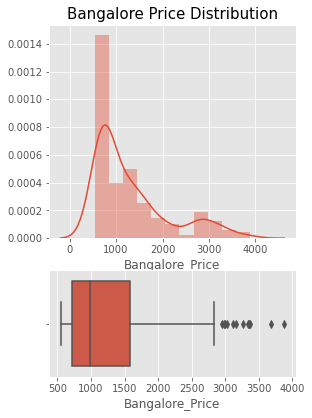

In [12]:
from matplotlib import gridspec
plt.rcParams['figure.figsize'] = [15,10]
gs = gridspec.GridSpec(3, 3, width_ratios=[2.5, 2.5, 2.5], height_ratios=[.20, .10, .15])
a1 = plt.subplot(gs[0, 0])
a1.set_title("Bangalore Price Distribution", fontsize=15)
a1=sns.distplot(data.Bangalore_Price)

a2 = plt.subplot(gs[1, 0])
a2= sns.boxplot(data.Bangalore_Price)

plt.show()


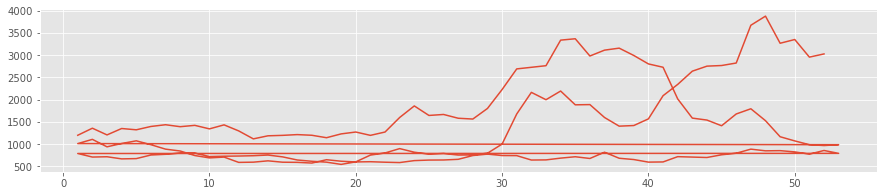

In [13]:
plt.rcParams['figure.figsize'] = [15,3]
plt.figure(10)

plt.plot(data['CW'] ,data['Bangalore_Price'])

In [14]:
corr = data.corr()
corr

,Bangalore_Price,Delhi_Price,Hyderabad_Price,Kolkata_Price,Pune_Price,Karnataka,Delhi,Andrapradesh,Westbengal,Maharashtra
Bangalore_Price,1.000000,0.918511,0.923425,0.942094,0.834583,0.164577,0.035333,0.252333,0.137691,0.092358
Delhi_Price,0.918511,1.000000,0.966673,0.957481,0.943223,0.136086,0.017023,0.245488,0.091247,0.064200
Hyderabad_Price,0.923425,0.966673,1.000000,0.942493,0.916628,0.168034,0.048344,0.278448,0.139361,0.111668
Kolkata_Price,0.942094,0.957481,0.942493,1.000000,0.947758,0.228054,0.031685,0.359958,0.166121,0.141726
Pune_Price,0.834583,0.943223,0.916628,0.947758,1.000000,0.202971,0.018591,0.344618,0.134672,0.104818
Karnataka,0.164577,0.136086,0.168034,0.228054,0.202971,1.000000,0.734313,0.829760,0.921846,0.837774
Delhi,0.035333,0.017023,0.048344,0.031685,0.018591,0.734313,1.000000,0.503488,0.751791,0.736726
Andrapradesh,0.252333,0.245488,0.278448,0.359958,0.344618,0.829760,0.503488,1.000000,0.802262,0.832191
Westbengal,0.137691,0.091247,0.139361,0.166121,0.134672,0.921846,0.751791,0.802262,1.000000,0.882472
Maharashtra,0.092358,0.064200,0.111668,0.141726,0.104818,0.837774,0.736726,0.832191,0.882472,1.000000


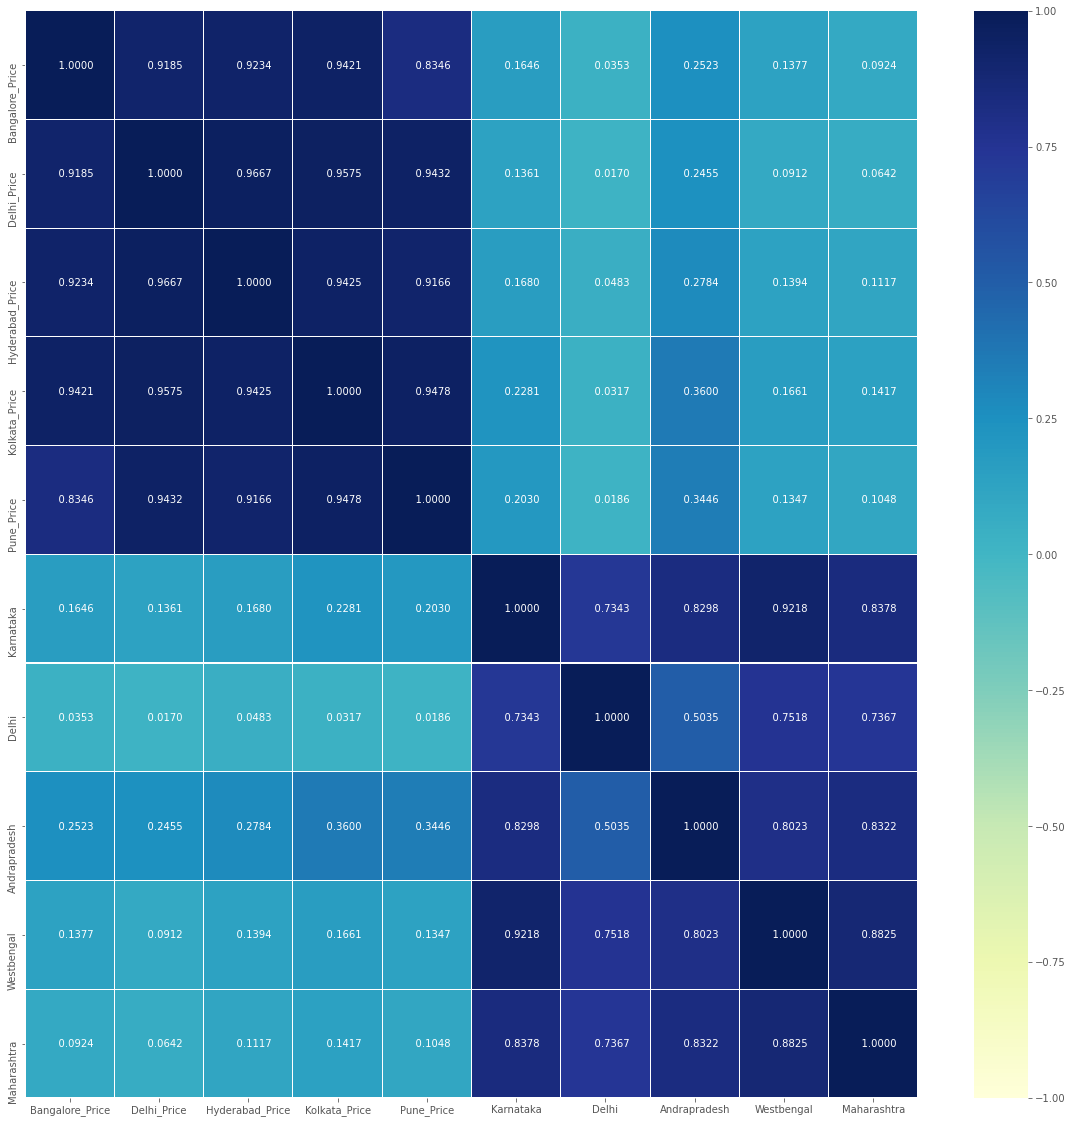

In [15]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')
plt.show()

3.How is the seasons affecting on the price of onion?


In [16]:
#Adding a date coulum
data['date'] = pd.to_datetime(data.CW.astype(str)+
                           data.Year.astype(str).add('-1') ,format='%V%G-%u')


In [17]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='01/02/'+year, end='31/03/'+year),
               'summer': pd.date_range(start='01/04/'+year, end='30/06/'+year),
               'Monsoon': pd.date_range(start='01/07/'+year, end='15/09/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['Monsoon']:
        return 'Monsoon'
    else:
        return 'winter'

# Assuming df has a date column of type `datetime`
data['season'] = data.date.map(season_of_date)

In [18]:
#Finding the average price of onion in Bangalore 
data.loc[:,"Bangalore_Price"].mean()

1305.7025316455697

In [19]:
#Create a null hypothesis of each season to compare the average price in that specific season vs the total mean price 

In [31]:
# For summer

# H0 : mu >= 1305
# H1 : mu < 1305
Bangalore_Price_Summer=data[(data.Bangalore_Price) & (data.season.str.contains('summer'))]
Bangalore_Onion_Price_Summer= Bangalore_Price['Bangalore_Price'].to_list()

xbar = np.mean(Bangalore_onion_Price)
n= len(Bangalore_Price_Summer)
s= np.std(Bangalore_onion_Price, ddof = 1)
se = s/np.sqrt(n)
mu = 1305
print('Population Size := ',len(Bangalore_Price_Summer))
print("Critical Values")
print(stats.norm.isf(0.05,loc=mu,scale=se))
print("Sample Mean")
print(xbar)
print("Observed sample mean is lesser than Critical Value hence accept Null")
print("P-Value")
print(1-stats.norm.cdf(xbar,loc=mu,scale=se))
print("P-Value is more than Alpha, hence accept Null")
z_stat =  (xbar - mu) / (sigma /np.sqrt(n))
# t_stat,p-value = stats.ttest_1samp(a=time, popmean=2.3)

# lets check the normaility of data
# perform Shapiro-Wilk test to test the normality

stat, p_value = shapiro(Bangalore_Onion_Price_Summer)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
print('p-value is not greater than 0.05, thus we can say that the data is not normally distributed.')


# 'ztest()' returns the test statistic and corresponding p-value
# pass the sample data to the parameter, 'x1'
# pass the value in null hypothesis to the parameter, 'value'
# pass the one-tailed condition to the parameter, 'alternative'
z_score, pval = stests.ztest(x1 = Bangalore_onion_Price, value = 2.3, alternative = 'larger')

# print the test statistic and corresponding p-value
print("Z-score: ", z_score)
print("p-value: ", pval)

#claculate confidence interval
# calculate the 95% confidence interval for the population mean
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
# use 'stdev()' to calculate the sample standard deviation 
print('Confidence interval:', stats.norm.interval(0.95, loc = np.mean(Bangalore_onion_Price),scale = statistics.stdev(Bangalore_onion_Price) / np.sqrt(len(Bangalore_onion_Price))))

Population Size :=  16
Critical Values
1444.197408535397
Sample Mean
888.75
Observed sample mean is lesser than Critical Value hence accept Null
P-Value
0.9999995643960987
P-Value is more than Alpha, hence accept Null
Test statistic: 0.8422527313232422
P-Value: 0.010500626638531685
p-value is not greater than 0.05, thus we can say that the data is not normally distributed.
Z-score:  10.474911228252884
p-value:  5.63216185431693e-26
Confidence interval: (722.8860574579958, 1054.6139425420042)
